### RGB Resimlerde CONV işlemi aşağıdaki gibi yapılmaktadır.

![RGB RESİMDE CONV İŞLEMİ](https://i.hizliresim.com/boykz4l.PNG)

## Verilerin Yüklenmesi

In [1]:
import tensorflow as tf
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
#veri setinin bulunduğu URL
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#zip tanımı, origindeki dosyayı indirip veri kümesine yerleştirir
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = url, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


In [3]:
#zip_dir bulunduğu dizin
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
#ana dizin tanımı
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
#eğitim dizini tanımı
train_dir = os.path.join(base_dir , 'train')
#test dizini tanımı
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
#kedilerin  eğitim seti
cat_train_dir = os.path.join(train_dir, 'cats')
#kedilerin test dizini
cat_validation_dir = os.path.join(validation_dir, 'cats')
#köpeklerin eğitim seti
dog_train_dir = os.path.join(train_dir, 'dogs')
#köpeklerin test seti 
dog_validation_dir = os.path.join(validation_dir,'dogs')

## Verilerin Anlaşılması

In [6]:
#eğitim ve doğrulama setindeki resim sayıları
cat_t_numbers = len(os.listdir(cat_train_dir))
dog_t_numbers = len(os.listdir(dog_train_dir))

cat_v_numbers = len(os.listdir(cat_validation_dir))
dog_v_numbers = len(os.listdir(dog_validation_dir))

print('Kedi Eğitim Seti Veri Sayısı : ', cat_t_numbers)
print('Köpek Eğitim Seti Veri Sayısı : ',dog_t_numbers)
print('Kedi Test Seti Veri Sayısı : ', cat_v_numbers)
print('Köpek Test Seti Veri Sayısı : ', dog_v_numbers)

Kedi Eğitim Seti Veri Sayısı :  1000
Köpek Eğitim Seti Veri Sayısı :  1000
Kedi Test Seti Veri Sayısı :  500
Köpek Test Seti Veri Sayısı :  500


## Model Parametreleri

In [7]:
#model parametreleri
BATCH_SIZE = 100 #modelin ağırlık ve sapmasını güncellemeden önce modeli beslediğimiz eğitim örneği sayısı
IMG_SHAPE = 150 #resimlerin yükseklik ve genişliği 150x150 olacaktır

## Verilerin Hazırlanması

In [8]:
#görüntüleri diskten okuyup tüm pikselleri 0 ile 1 arasına çevirme
train_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

In [9]:
#dizindeki yol ile verisetini oluşturma 
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_SHAPE,IMG_SHAPE),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


> **flow_from_directory** içerisindeki directory argümanı dosyanın yolunu, shuffle argümanı true ise tüm verilerin karıştırılacağını, batch_size resimlerin kaç adet olarak toplulaştırılacağını, target_size resimlerin boyutunu, class_mode ise döndürülen etiket dizilerinin türüdür burada türü binary'dir

In [10]:
val_data_gen = test_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                        directory = validation_dir,
                                                        shuffle = False,
                                                        target_size = (IMG_SHAPE,IMG_SHAPE),
                                                        class_mode = 'binary')

Found 1000 images belonging to 2 classes.


## Resim Görselleştirme

In [11]:
sample_training_images, _ = next(train_data_gen)

> **next** belirtilen konumdan birçok etiket ve resim döndürür, bizim etiketlerle şuan işimiz olmadığı için tanım yapmayıp ,_ koyduk.

In [12]:
#resim göstermek için fonksiyon
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20)) #1e5'lik 20 20 büyüklüğünde pencere
  axes = axes.flatten() # axesi düzleştirme
  
  for image, ax in zip(images_arr, axes):
    ax.imshow(image) #resmi göster
  plt.tight_layout() #alt nokta parametreleri otomatik ayarlama(sığması için)
  plt.show() #pencereyi göster

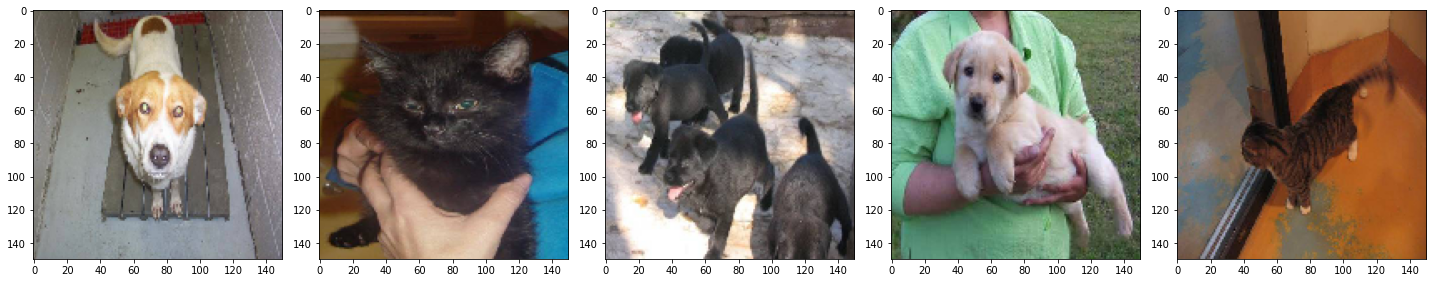

In [13]:
plotImages(sample_training_images[:5]) #5 resmi görüntüleme (5.indekse kadar)

## Model Oluşturma

In [14]:
#model tanımı
model = tf.keras.models.Sequential()

In [15]:
#katmanların eklenmesi
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(2, activation = 'softmax'))


## Modelin Derlenmesi

In [16]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
#ağın katmanları
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Modelin Eğitimi

In [18]:
total_train = cat_t_numbers + dog_t_numbers
total_val = cat_v_numbers + dog_v_numbers

In [19]:
trained = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs = 100,
                              validation_data = val_data_gen,
                              validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 22s 533ms/step - loss: 0.7086 - accuracy: 0.5030 - val_loss: 0.6879 - val_accuracy: 0.5590
Epoch 2/100
20/20 [==============================] - 11s 530ms/step - loss: 0.6823 - accuracy: 0.5570 - val_loss: 0.6713 - val_accuracy: 0.5770
Epoch 3/100
20/20 [==============================] - 10s 518ms/step - loss: 0.6690 - accuracy: 0.5910 - val_loss: 0.6501 - val_accuracy: 0.6280
Epoch 4/100
20/20 [==============================] - 10s 522ms/step - loss: 0.6557 - accuracy: 0.6115 - val_loss: 0.6291 - val_accuracy: 0.6530
Epoch 5/100
20/20 [==============================] - 10s 524ms/step - loss: 0.5928 - accuracy: 0.6860 - val_loss: 0.6143 - val_accuracy: 0.6770
Epoch 6/100
20/20 [==============================] - 10s 522ms/step - loss: 0.5705 - accuracy: 0.7020 - val_loss: 0.6049 - val_accuracy: 0.6660
Epoch 7/100
20/20 [==============================] - 10s 526ms/step - loss: 0.5275 - accuracy: 0.7330 - val_loss: 0.5788 - val_accuracy: 0.6980
Epoc

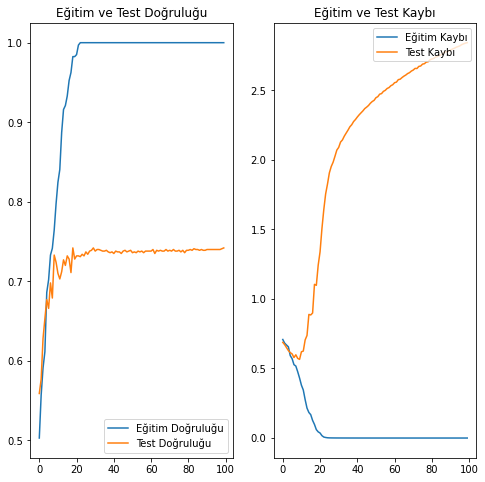

In [21]:
#eğitim ve testin kayıp ve doğruluklarının zaman içinde değişim grafiği
acc = trained.history['accuracy'] #eğitim doğruluğu
val_acc = trained.history['val_accuracy'] #test doğruluğu

loss = trained.history['loss'] #eğitim kaybı
val_loss = trained.history['val_loss'] #test kaybı

epochs_range = range(100) #epochs 100

plt.figure(figsize=(8, 8)) #8 8 büyüklüğünde pencere
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Test Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Test Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Test Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Test Kaybı')
plt.savefig('./foo.png')
plt.show()